In [255]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline

#### Exploring data analysis

In [111]:
df = pd.read_csv('soybean-large_data.csv')

In [112]:
df.head()

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [113]:
df.shape

(307, 36)

By exploring data we could see that we have '?' in several values. Let's delete it.

In [114]:
mask = df.eq('?')

In [115]:
df = df.loc[~mask.any(1)]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 289
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             266 non-null    object
 1   date             266 non-null    object
 2   plant-stand      266 non-null    object
 3   precip           266 non-null    object
 4   temp             266 non-null    object
 5   hail             266 non-null    object
 6   crop-hist        266 non-null    object
 7   area-damaged     266 non-null    object
 8   severity         266 non-null    object
 9   seed-tmt         266 non-null    object
 10  germination      266 non-null    object
 11  plant-growth     266 non-null    object
 12  leaves           266 non-null    int64 
 13  leafspots-halo   266 non-null    object
 14  leafspots-marg   266 non-null    object
 15  leafspot-size    266 non-null    object
 16  leaf-shread      266 non-null    object
 17  leaf-malf        266 non-null    ob

In [117]:
cols = df.columns.drop('name')

In [118]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 289
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             266 non-null    object
 1   date             266 non-null    int64 
 2   plant-stand      266 non-null    int64 
 3   precip           266 non-null    int64 
 4   temp             266 non-null    int64 
 5   hail             266 non-null    int64 
 6   crop-hist        266 non-null    int64 
 7   area-damaged     266 non-null    int64 
 8   severity         266 non-null    int64 
 9   seed-tmt         266 non-null    int64 
 10  germination      266 non-null    int64 
 11  plant-growth     266 non-null    int64 
 12  leaves           266 non-null    int64 
 13  leafspots-halo   266 non-null    int64 
 14  leafspots-marg   266 non-null    int64 
 15  leafspot-size    266 non-null    int64 
 16  leaf-shread      266 non-null    int64 
 17  leaf-malf        266 non-null    in

In [120]:
report = ProfileReport(df, title='soybean', html={'style':{'full_width':True}})

In [121]:
report.to_file(output_file="soybean.html")

We could see several graphics in report file.

In [123]:
corr_matrix = df.corr().abs()

In [124]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [125]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [128]:
to_drop

['leafspots-marg']

In [126]:
df = df.drop(df[to_drop], axis=1)

In [129]:
df.head()

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


#### Split our data

In [133]:
y = df['name']
df = df.drop(['name'], axis = 1)

In [136]:
df.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,6,0,2,1,0,1,1,1,0,0,...,0,0,0,4,0,0,0,0,0,0
1,4,0,2,1,0,2,0,2,1,1,...,0,0,0,4,0,0,0,0,0,0
2,3,0,2,1,0,1,0,2,1,2,...,0,0,0,4,0,0,0,0,0,0
3,3,0,2,1,0,1,0,2,0,1,...,0,0,0,4,0,0,0,0,0,0
4,6,0,2,1,0,2,0,1,0,2,...,0,0,0,4,0,0,0,0,0,0


In [137]:
X_train, X_test, y_train, y_test = train_test_split(df, y,
                                                    stratify=y, 
                                                    test_size=0.25)

#### Use RandomForestClassifier

In [193]:
clf = RandomForestClassifier(max_depth=8, n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
y_pred=clf.predict(X_test)

In [196]:
clf.score(X_test, y_test)

0.8805970149253731

In [226]:
metrics.f1_score(y_test, y_pred, average='macro')

0.9050915750915751

In [264]:
matrix = metrics.confusion_matrix(y_test, y_pred)

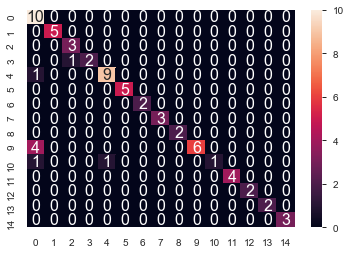

In [265]:
ax = sns.heatmap(matrix, annot = True, annot_kws={"size": 16})

We can see that score for our RandomForestClassifier is 0.88. With confusion_matrix we can see our errors. 

In [200]:
feature_imp = pd.Series(clf.feature_importances_,index=df.columns).sort_values(ascending=False)

Let's print the three best features.

In [202]:
feature_imp[:3]

date              0.086320
leafspot-size     0.074686
leafspots-halo    0.069313
dtype: float64

Let's visualize our all features.

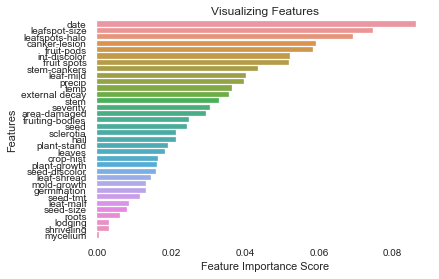

In [218]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Features")
plt.show()

In [242]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,12],
    'criterion' :['gini', 'entropy']
}

In [245]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [246]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [259]:
rfc1 = RandomForestClassifier(random_state=42, n_estimators= 200, max_depth=8, criterion='entropy', max_features='sqrt')

In [260]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [261]:
pred=rfc1.predict(X_test)

In [262]:
print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8955223880597015


The GridSearch found the best parameters and the accuracy for Random Forest was 0.895. It is better than accuracy with our params. 